# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM JS2**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Normalizer
from statsmodels.graphics.correlation import plot_corr
from sklearn import metrics
import seaborn as sn
from scipy.stats import pearsonr
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from xgboost.sklearn import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import pickle
from PIL import Image
import requests
from io import BytesIO

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv('df_train.csv')
df.head(10)

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   
5           5  2015-01-01 18:00:00           1.000000           level_7   
6           6  2015-01-01 21:00:00           1.000000           level_8   
7           7  2015-01-02 00:00:00           1.000000           level_9   
8           8  2015-01-02 03:00:00           1.000000           level_9   
9           9  2015-01-02 06:00:00           1.000000           level_9   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   
5             0.0             1.000000         69.666667        67.333333   
6             0.0             1.000000         83.666667        63.333333   
7             0.0             1.000000         83.666667        64.000000   
8             0.0             1.000000         86.000000        63.333333   
9             0.0             1.333333         87.000000        63.666667   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0           0.000000           1.000000  ...       265.938000      281.013000   
1           0.000000           1.000000  ...       266.386667      280.561667   
2           0.000000           1.000000  ...       272.708667      281.583667   
3           0.000000           1.000000  ...       281.895219      283.434104   
4           2.000000           0.333333  ...       280.678437      284.213167   
5          12.333333           0.666667  ...       274.639229      284.165625   
6          16.333333           1.000000  ...       268.287000      283.420333   
7           8.666667           1.333333  ...       266.882333      282.474000   
8           5.333333           1.000000  ...       266.226667      281.726667   
9          15.333333           1.000000  ...       266.878000      281.803000   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   
5       277.919000   277.919000          284.165625       277.919000   
6       274.295437   274.295437          283.420333       274.295437   
7       272.903167   272.903167          282.474000       272.903167   
8       271.780115   271.780115          281.726667       271.780115   
9       271.673667   271.673667          281.803000       271.673667   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  
5        282.077844  274.639229       274.639229        6842.000000  
6        277.637000  268.287000       268.287000       10760.333333  
7        276.457333  266.882333       266.882333       10866.000000  
8        276.1

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# look at data statistics
df.describe()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count  8763.000000        8763.000000     8763.000000          8763.000000   
mean   4381.000000           2.425729        0.135753             2.586272   
std    2529.804538           1.850371        0.374901             2.411190   
min       0.000000           0.000000        0.000000             0.000000   
25%    2190.500000           1.000000        0.000000             1.000000   
50%    4381.000000           2.000000        0.000000             1.666667   
75%    6571.500000           3.333333        0.100000             3.666667   
max    8762.000000          13.000000        3.000000            52.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       8763.000000      8763.000000        8763.000000   
mean          62.658793        57.414717          43.469132   
std           22.621226        24.335396          32.551044   
min            8.333333         6.333333           0.000000   
25%           44.333333        36.333333          10.000000   
50%           65.666667        58.000000          45.000000   
75%           82.000000        78.666667          75.000000   
max          100.000000       100.000000         100.000000   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  ...  \
count        8763.000000         8763.000000      8763.000000  ...   
mean            1.850356           13.714748       158.957511  ...   
std             1.695888           24.272482       102.056299  ...   
min             0.000000            0.000000         0.000000  ...   
25%             0.666667            0.000000        73.333333  ...   
50%             1.000000            0.000000       147.000000  ...   
75%             2.666667           20.000000       234.000000  ...   
max            12.666667           97.333333       359.333333  ...   

       Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
count      8763.000000     8763.000000      8763.000000  8763.000000   
mean        289.540309      289.855459       285.017973   286.422929   
std           9.752047        6.528111         6.705672     6.818682   
min         264.983333      270.816667       264.483333   267.483333   
25%         282.150000      284.973443       280.085167   281.374167   
50%         288.116177      289.416667       284.816667   286.158333   
75%         296.816667      294.909000       289.816667   291.034167   
max         314.483333      307.316667       309.816667   310.710000   

       Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  \
count         8763.000000      8763.000000       8763.000000  8763.000000   
mean           288.447422       287.966027        291.633356   288.419439   
std              6.102593         7.105590          8.178220     9.346796   
min            269.483333       269.063000        270.150000   264.983333   
25%            284.150000       282.836776        285.816667   281.404281   
50%            288.150000       287.630000        290.816667   287.053333   
75%            292.966667       292.483333        297.150000   295.154667   
max            304.816667       317.966667        314.816667   313.133333   

       Madrid_temp_min  load_shortfall_3h  
count      8763.000000        8763.000000  
mean        287.202203       10673.857612  
std           9.206237        5218.046404  
min         264.983333       -6618.000000  
25%         280.299167        7390.333333  
50%         286.083333       11114.666667  
75%         293.884500       14498.166667  
max         310.383333       31904.000000  

[8 rows x 46 columns]

We see that Valencia Pressure is the only column that has missing values:

In [4]:
df.isnull().sum()[df.isnull().sum()>0]

Valencia_pressure    2068
dtype: int64

Next we find the columns that have a considerable Kurtosis (|kurtosis|>3) and level of Skew (|skew|>1)

In [5]:
# plot relevant feature interactions
outliers = df.kurtosis()[abs(df.kurtosis())>3].index.tolist()
skewed = df.skew()[abs(df.skew())>1].index.tolist()

print("Columns that are highly skewed:",skewed,"\n")
print("Columns that have considerable outliers:",outliers)

Columns that are highly skewed: ['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_clouds_all', 'Barcelona_wind_speed', 'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Seville_weather_id', 'Valencia_pressure', 'Madrid_pressure', 'Bilbao_weather_id'] 

Columns that have considerable outliers: ['Bilbao_rain_1h', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Seville_weather_id']


C:\Users\matib\AppData\Local\Temp/ipykernel_980/2887511135.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outliers = df.kurtosis()[abs(df.kurtosis())>3].index.tolist()
C:\Users\matib\AppData\Local\Temp/ipykernel_980/2887511135.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewed = df.skew()[abs(df.skew())>1].index.tolist()


Plotting hist graph to look at the relevant feature interactions.

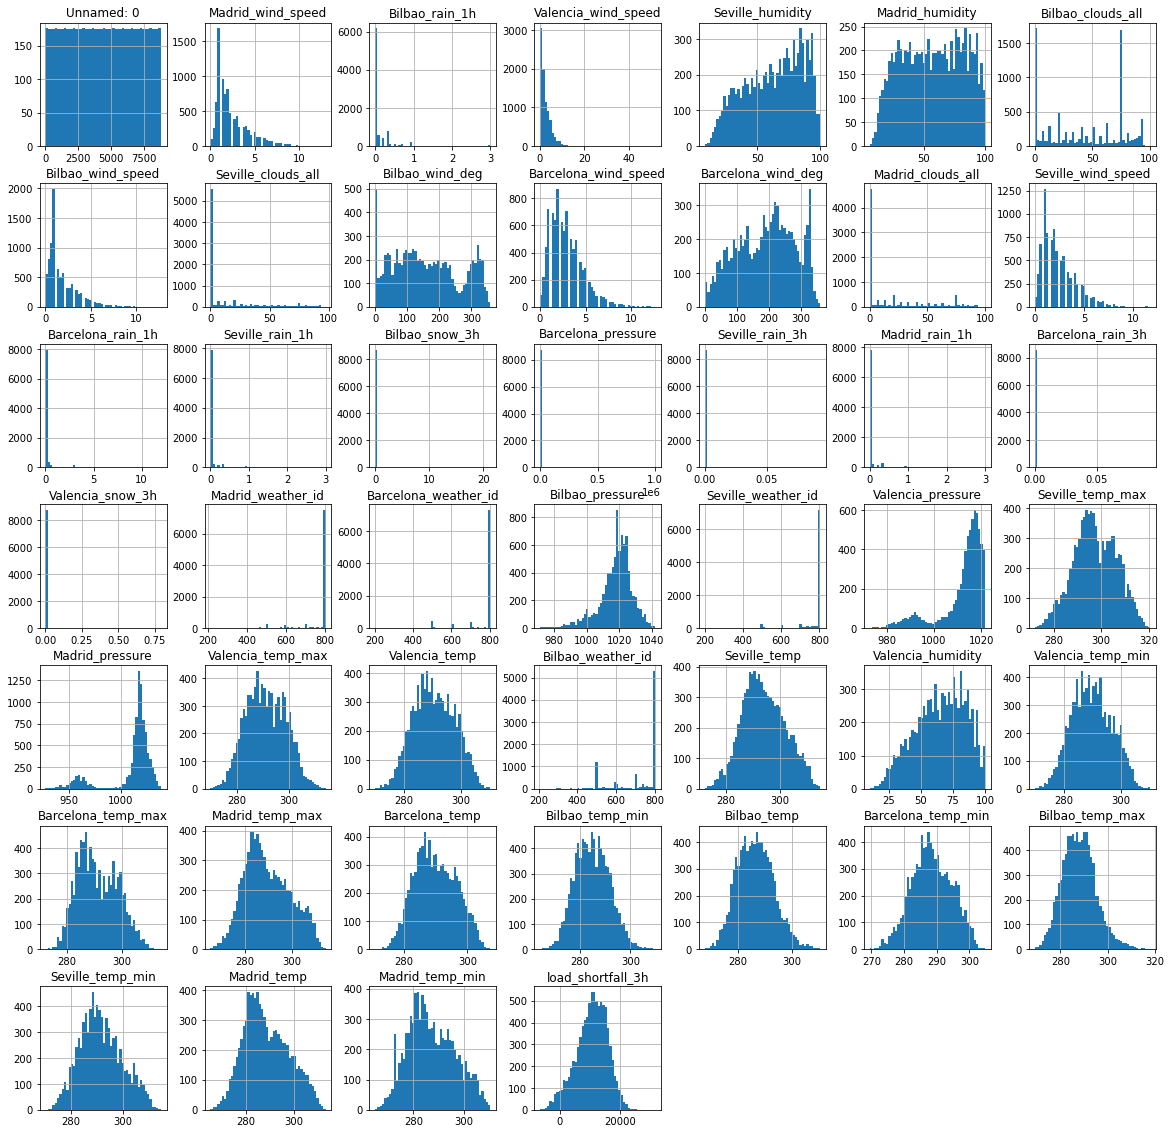

In [6]:
df.hist(bins=50, figsize=(20,20))
plt.show()

Lets us now see the correlation between our predictor variables and our response variable:

We then store the variables that have a low correlation in a list to our target variable, i.e., |correlation|<0.1 : 

In [7]:
corr_col=df.corr()["load_shortfall_3h"][abs(df.corr()["load_shortfall_3h"])<0.1].index.tolist()

# Evaluating correlation relationship using  Heatmap


- Let us also evaluate the relationships between our predictor variables and themselves. A high correlation can pose collinearity issues in our model down the line:

- The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation.
- When the coefficient is close to –1, it means that there is a strong negative correlation.
- When coefficients close to zero mean that there is no linear correlation.

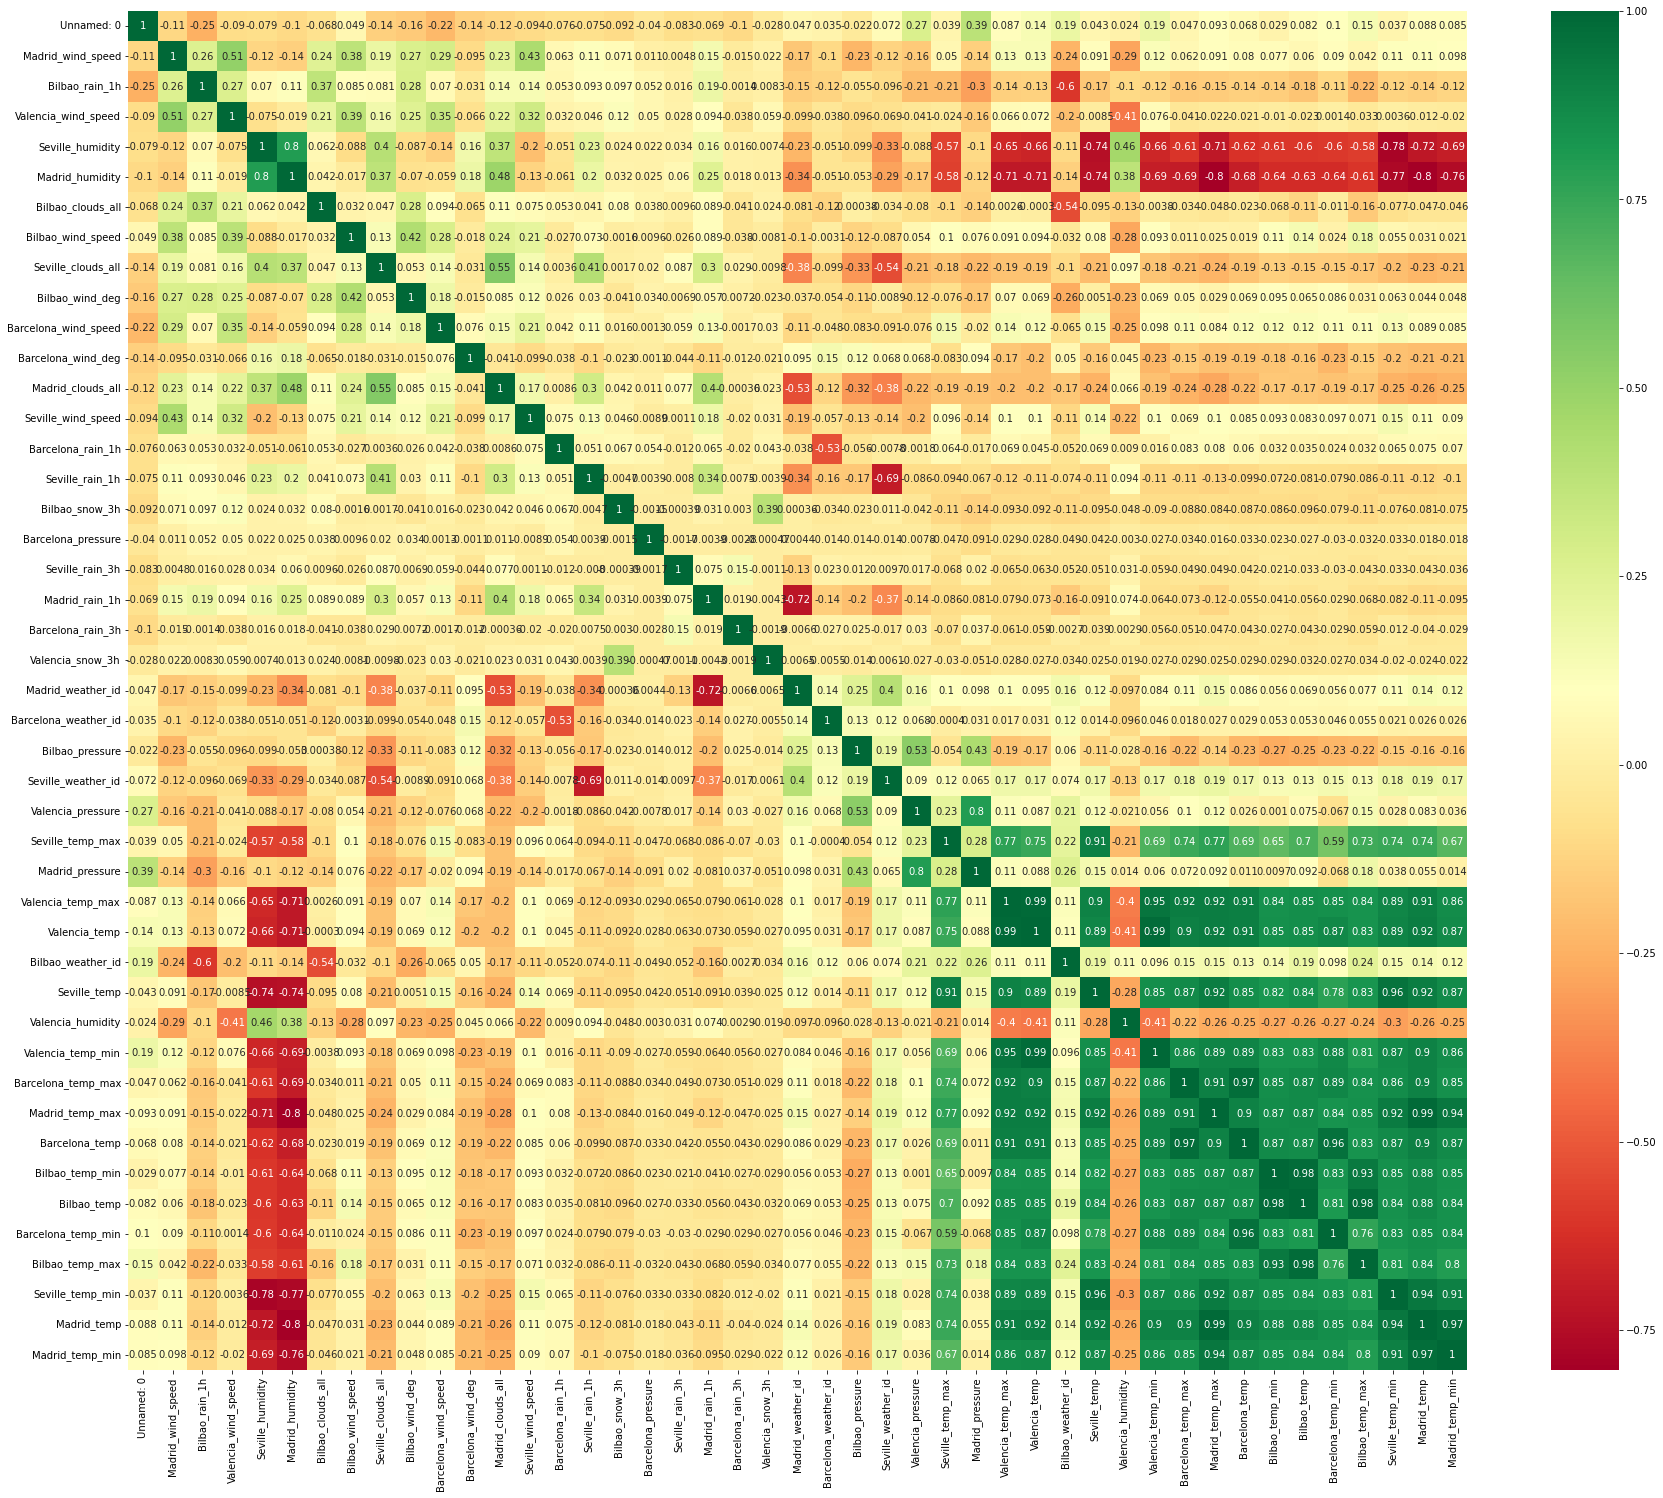

In [8]:
corrmat = df.iloc[:,:-1].corr()
top_corr = corrmat.index
fig = plt.figure(figsize=(30,25));
ax = fig.add_subplot(111);
sn.heatmap(df[top_corr].corr(), annot = True, cmap='RdYlGn');

In [9]:
# Return columns with correlation treshold of 0.8 or more.
threshold=0.8

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(df.iloc[:,:-1],threshold)

{'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_min'}

from the correlation table above we see that the temp min and max variables all have a significant correlation between each other with most of them being above 0.8. We also store these variables in a list:

In [10]:
min_max = []
for col in df.columns.tolist():
    if "max" in col.split("_") or "min" in col.split("_"):
        min_max.append(col)

We also note that there seems to be a column which seems to be nothing more than a duplicate of the index, "Unnamed: 0", which we remove. Furthermore, "Valencia_wind_deg" and "Seville_pressure" are not measured in the same units as the other "_wind_deg" and "_pressure" columns and with no way to convert them, we will later drop them 

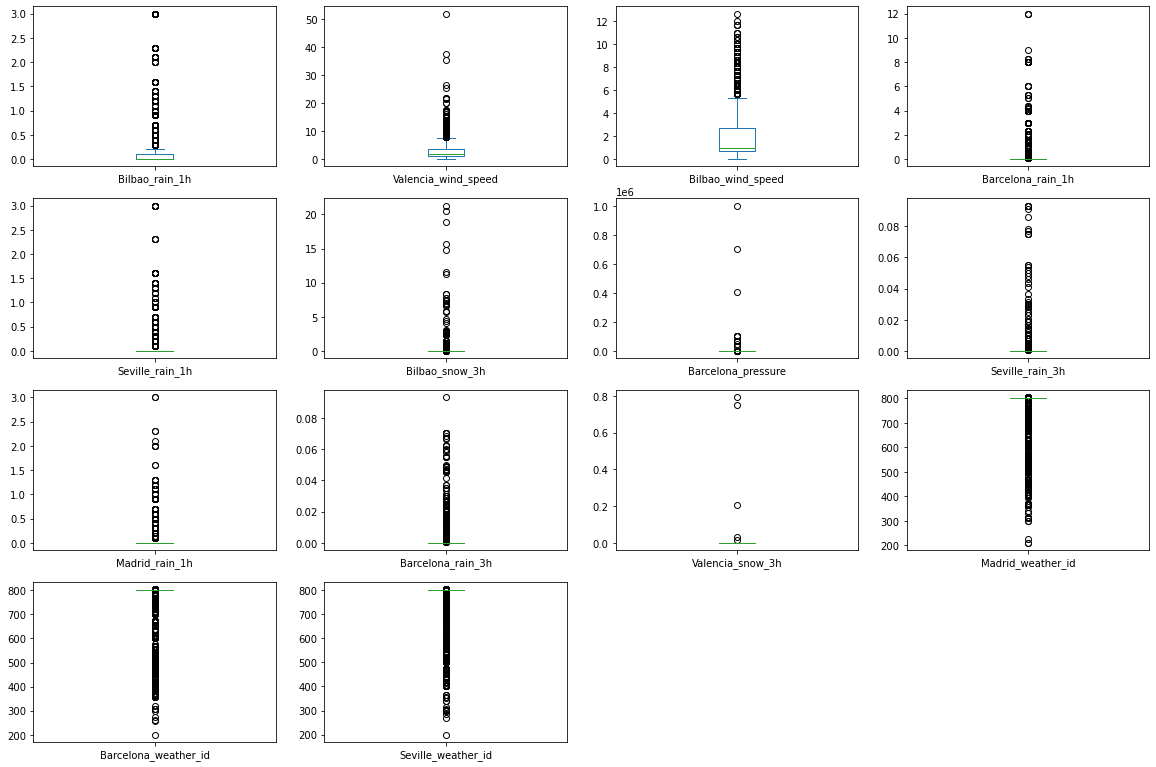

In [11]:
# have a look at feature distributions
df[outliers].plot(kind = 'box', figsize=(20,70), layout = (20,4), subplots = True, sharex = False)
plt.show()

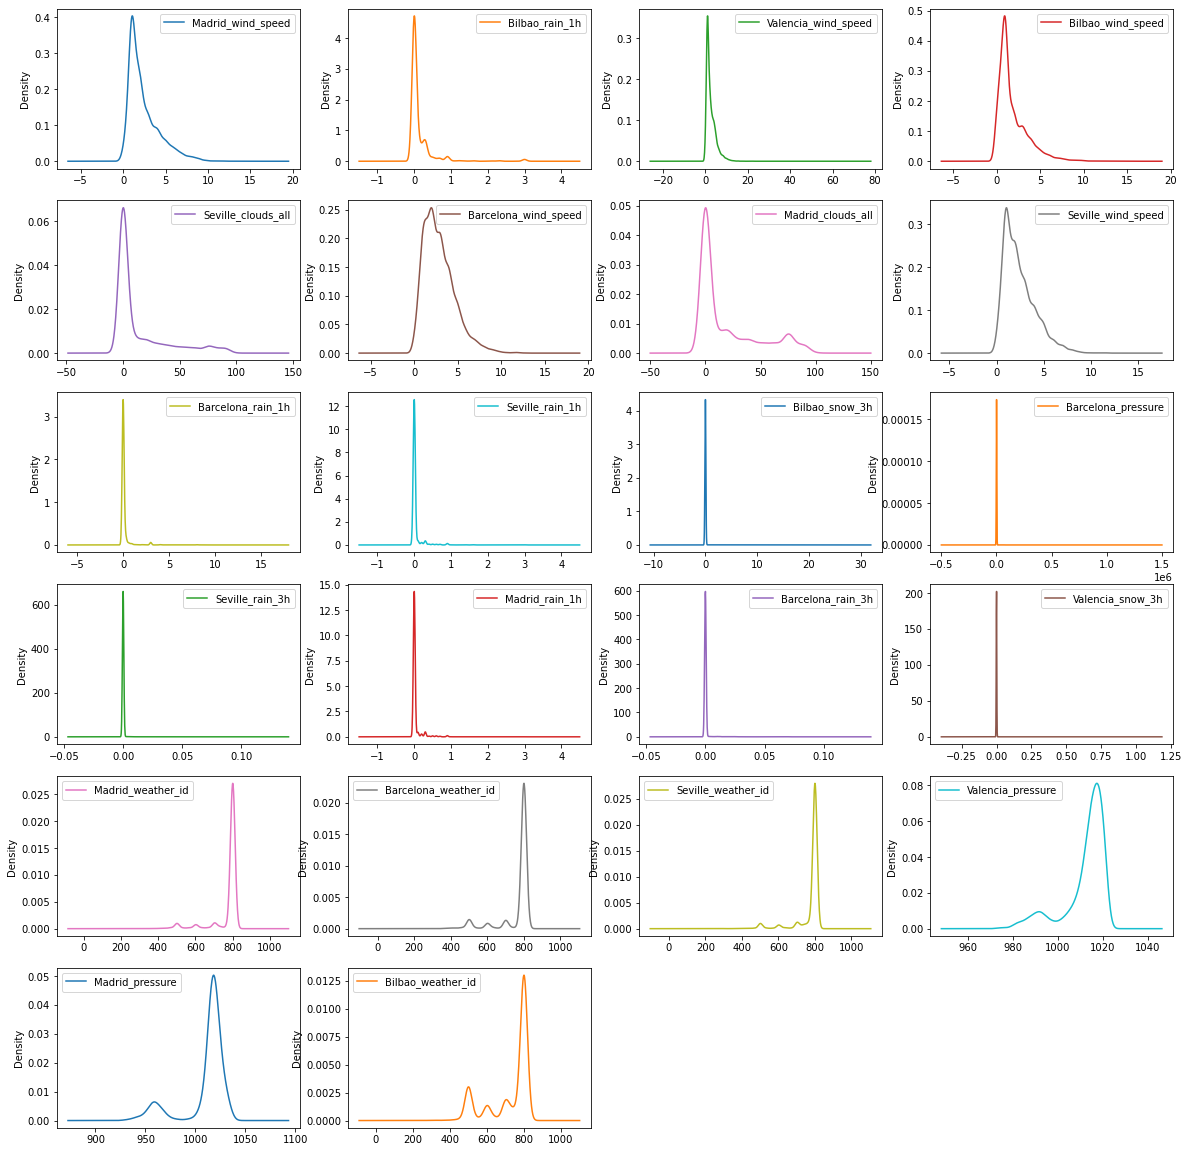

In [12]:
df[skewed].plot(kind = 'density', figsize=(20,70), layout = (20,4), subplots = True, sharex = False)
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [13]:
# remove missing values/ features
#As we discovered above, Valencia Pressure is the only column with empty values. We replace these values with the mode
df['Valencia_pressure'] = df['Valencia_pressure'].fillna(df['Valencia_pressure'].mode()[0])

In [14]:
# create new features
#Next we split the time column into year, month, day, hour and minute 
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute

In [15]:
# engineer existing features
df = df.drop(["time", "Unnamed: 0", "Valencia_wind_deg", "Seville_pressure"], axis = 1)

* We did consider onehotencoder for "Valencia_wind_deg" and "Seville_pressure" during our data engineering process.

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

 **Split Data**

In [16]:
    #We then split our data into our response and predictor variables
    x = df.drop(["load_shortfall_3h"], axis = 1)
    y = df["load_shortfall_3h"]
    
    #We also create a scaler for our LASSO and Ridge Models
    scaler = StandardScaler()
    scaledx = scaler.fit_transform(x)
    
    #Next we split the data into the training and test set, the X_scaled_train, X_scaled_test will be used in the LASSO and
    #Ridge Models
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
    X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(scaledx, y, test_size = 0.2, random_state=0)

 **Model Selection**
<a id="Model_selection"></a>

**Our AIM**: An rmse score below 4000

**Procedure**:

1. Create  different models. 
2. Compare the models by their mean RMSE (or MSE) 
3. The comparison in std will tell us if there are outliars in the data - and inform us if we should drop some rows. 
3.1 After dropping extra rows if we will, we'll start again from step 1, else procceed to next step.
4. Choose one with the lowest RMSE 
5. Train the best model with the whole train data set - we will be certain that there is no bias in the data because of the standard deviation
6. Run predictions of the final test set
7. Upload predictions and observe Kaggle's RMSE in comparison to ours from the model. 
    Note: A good regressor model according to us, will overestimate the error, and when tested on Kaggle, we'll get a smaller one. 
    However, this will imply also that there are some outliers in the data which, all be it, are minimized. (Underfitted, in a way)
8. Make necessary changes in our procedure and cleaning if rmse is greater than our intended. 

To make the modelling process easier and more efficient to fit our data on other models we have created a function that takes in a dataframe and produces the test and train RMSE values from a Linear, Ridge, LASSO, Decision Tree and a Random Forrest regression

**STEP 1. Scaled and Unscaled training dataset**

    1. We will hereby construct a Scaled dataset from: 
        * Linear Regressor.
        * Decision Tree Regressor.
        * Forest Tree Regressor. 
    2. We will construct a Scaled dataset from: 
        1. Lasso Regressor
        2. Ridge Regressor

    3. Made a for loop, to iterate through the list of models and print the RMSE of both the both the train and test scores. 
We will then clean our data with outliers to get more accurate results. 
If they are still ther, we need to evaluate them against other models.

In [17]:
def model_tester(df,columns, alpha, n_estimators, max_depth):
    
    df = df[columns] # First we create the dataframe with the specified columns
    
    # Next we create the different regression models
    # Linear Regressor model
    lm = LinearRegression()
    # Ridge Regressor model
    rg = Ridge()
    # Lasso Regressor Model
    lasso = Lasso(alpha = alpha)
    # Decision Tree Regressor Model
    regr_tree = DecisionTreeRegressor(max_depth = max_depth,random_state=0)
    #Random Forest Regressor Mdoel
    RF = RandomForestRegressor(n_estimators = n_estimators, random_state=0) 
    # Set our models to perform linearly
    models = [lm,rg,lasso,regr_tree, RF]
    

    
    #We them fit the relevant data to our various models
    lm.fit(X_train, y_train)
    rg.fit(X_scaled_train, y_train)
    lasso.fit(X_scaled_train, y_train)
    regr_tree.fit(X_train, y_train)
    RF.fit(X_train,y_train)
    
    # We then predict out y_test values and use the outputs to compute the test/train RMSE values 
    RMSE = []
    index = 0
    # Predict the unscaled models 
    for model in [lm, regr_tree, RF]:
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        # Trains and Tests the root mean squared error of the predicts
        train_rmse = (metrics.mean_squared_error(y_train, y_pred_train))**(1/2)
        test_rmse = (metrics.mean_squared_error(y_test, y_pred_test))**(1/2)
        RMSE.append(test_rmse)
        # print out the RMSE of all the models
        print(str([lm, regr_tree, RF][index]))
        print('Train RMSE:', train_rmse)
        print('Test RMSE:', test_rmse)
        print("")
        
        index = index + 1
        
    index = 0
    # Predict the scaled models 
    for model in [lasso, rg]:
        y_pred_train = model.predict(X_scaled_train)
        y_pred_test = model.predict(X_scaled_test)
        train_rmse = (metrics.mean_squared_error(y_train, y_pred_train))**(1/2)
        test_rmse = (metrics.mean_squared_error(y_test, y_pred_test))**(1/2)
        RMSE.append(test_rmse)
        print(str([lasso, rg][index]))
        print('Train RMSE:', train_rmse)
        print('Test RMSE:', test_rmse)
        print("")
        
        index = index + 1
    
    plt.barh(["Linear Regression", "DecisionTreeRegressor", "RandomForestRegressor", "Lasso", "Ridge"], RMSE)
    plt.xlabel("Test_RMSE")
    plt.ylabel("Model")
        


We first try removing the variables with a high amount of outliers from the data:

In [18]:
df_outliers = df.drop(outliers, axis = 1)

C:\Users\matib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.754e+10, tolerance: 1.901e+07
  model = cd_fast.enet_coordinate_descent(


LinearRegression()
Train RMSE: 4720.649318122756
Test RMSE: 4797.831747175834

DecisionTreeRegressor(max_depth=15, random_state=0)
Train RMSE: 1453.2562219391962
Test RMSE: 4261.9556906980915

RandomForestRegressor(random_state=0)
Train RMSE: 1175.4359604012834
Test RMSE: 3094.826768228265

Lasso(alpha=0.01)
Train RMSE: 4721.345585582051
Test RMSE: 4795.5361661879

Ridge()
Train RMSE: 4720.999697850576
Test RMSE: 4796.007177914165



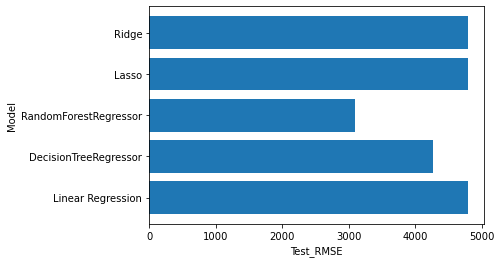

In [19]:
model_tester(df_outliers,df_outliers.columns.tolist(), alpha = 0.01, n_estimators = 100, max_depth = 15)

Next, we remove the data with a high amount out skewed data:

In [20]:
df_skewed = df.drop(skewed, axis = 1)

C:\Users\matib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.754e+10, tolerance: 1.901e+07
  model = cd_fast.enet_coordinate_descent(


LinearRegression()
Train RMSE: 4720.649318122756
Test RMSE: 4797.831747175834

DecisionTreeRegressor(max_depth=15, random_state=0)
Train RMSE: 1453.2562219391962
Test RMSE: 4261.9556906980915

RandomForestRegressor(random_state=0)
Train RMSE: 1175.4359604012834
Test RMSE: 3094.826768228265

Lasso(alpha=0.01)
Train RMSE: 4721.345585582051
Test RMSE: 4795.5361661879

Ridge()
Train RMSE: 4720.999697850576
Test RMSE: 4796.007177914165



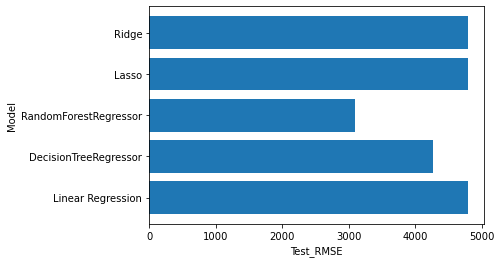

In [21]:
model_tester(df_skewed,df_skewed.columns.tolist(), alpha = 0.01, n_estimators = 100, max_depth = 15)

Next lets remove all the temp_min/temp_max values that showed a high level of collinearity:

In [22]:
df_min_max = df.drop(min_max, axis = 1)

C:\Users\matib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.754e+10, tolerance: 1.901e+07
  model = cd_fast.enet_coordinate_descent(


LinearRegression()
Train RMSE: 4720.649318122756
Test RMSE: 4797.831747175834

DecisionTreeRegressor(max_depth=15, random_state=0)
Train RMSE: 1453.2562219391962
Test RMSE: 4261.9556906980915

RandomForestRegressor(random_state=0)
Train RMSE: 1175.4359604012834
Test RMSE: 3094.826768228265

Lasso(alpha=0.01)
Train RMSE: 4721.345585582051
Test RMSE: 4795.5361661879

Ridge()
Train RMSE: 4720.999697850576
Test RMSE: 4796.007177914165



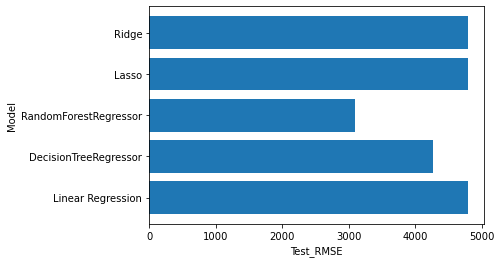

In [23]:
model_tester(df_min_max,df_min_max.columns.tolist(), alpha = 0.01, n_estimators = 100, max_depth = 15)

Next we remove the variables that showed a low correlation to our target variable:

In [24]:
df_least_corr = df.drop(corr_col, axis = 1)

C:\Users\matib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.754e+10, tolerance: 1.901e+07
  model = cd_fast.enet_coordinate_descent(


LinearRegression()
Train RMSE: 4720.649318122756
Test RMSE: 4797.831747175834

DecisionTreeRegressor(max_depth=15, random_state=0)
Train RMSE: 1453.2562219391962
Test RMSE: 4261.9556906980915

RandomForestRegressor(random_state=0)
Train RMSE: 1175.4359604012834
Test RMSE: 3094.826768228265

Lasso(alpha=0.01)
Train RMSE: 4721.345585582051
Test RMSE: 4795.5361661879

Ridge()
Train RMSE: 4720.999697850576
Test RMSE: 4796.007177914165



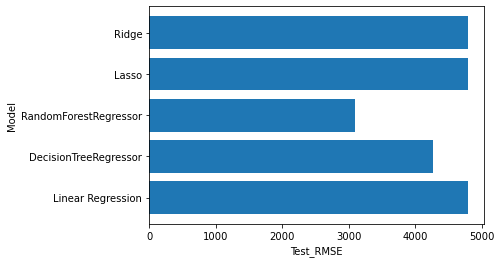

In [25]:
model_tester(df_least_corr,df_least_corr.columns.tolist(), alpha = 0.01, n_estimators = 100, max_depth = 15)

In [26]:
df2 = df.drop(["minute", "Barcelona_temp_min","Bilbao_temp_min", "Bilbao_temp", 'Seville_temp_max','Valencia_temp_max',
 'Valencia_temp_min','Barcelona_temp_max','Madrid_temp_max','Bilbao_temp_max','Seville_temp_min', "Bilbao_wind_deg"], axis = 1)

C:\Users\matib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.754e+10, tolerance: 1.901e+07
  model = cd_fast.enet_coordinate_descent(


LinearRegression()
Train RMSE: 4720.649318122756
Test RMSE: 4797.831747175834

DecisionTreeRegressor(max_depth=15, random_state=0)
Train RMSE: 1453.2562219391962
Test RMSE: 4261.9556906980915

RandomForestRegressor(random_state=0)
Train RMSE: 1175.4359604012834
Test RMSE: 3094.826768228265

Lasso(alpha=0.01)
Train RMSE: 4721.345585582051
Test RMSE: 4795.5361661879

Ridge()
Train RMSE: 4720.999697850576
Test RMSE: 4796.007177914165



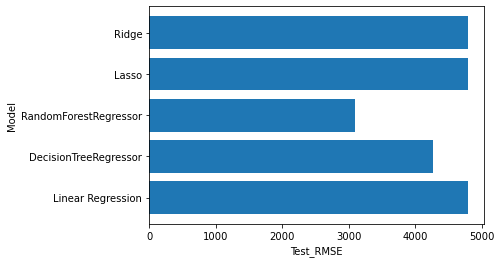

In [27]:
model_tester(df2,df2.columns.tolist(), alpha = 0.01, n_estimators = 100, max_depth = 15)

The above Random Forest model produced the lowest RMSE hence we use this as our final model: 

**STEP 2. Cross Validation:**

    1. We will hereby construct a cross validation from: 
        * Boosting Methods. 
    2. We will create a pipeline that will 
        1. Apply polynomial features
        2. Run the model. 

In [39]:
polinomial_features = PolynomialFeatures(1) 
# This is polynomial order of the variable incase of polynomial regression
# Linear models always improved with order 2; but other models got worse. 
# Other models were better than the best of Linear models in order 1. Hence it is currently in order 1


models = [GradientBoostingRegressor(), XGBRegressor()]
# We have chosen the models that improve the score from the LinearRegression model.


for mod in models:
    estimators = []
    estimators.append(('imputer', SimpleImputer(strategy='median')))
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('plf', polinomial_features))
    estimators.append(('mod', mod))
    model = Pipeline(estimators)

    # We'll use all the features of the clean data, x, and the target y

    # We'll use 5-fold cross validation. That is, a random 80% of the data will be used


    
    kfold = KFold(n_splits=5)

    results = cross_val_score(model,x,y, cv=kfold, scoring='neg_mean_squared_error')
    
    print(mod)
    print ('RMSE values =',sorted(np.sqrt(-np.array(results))))
    print('\n')
    
    

GradientBoostingRegressor()
RMSE values = [3887.19818911189, 3963.0473752927305, 4067.543618683739, 4257.571515279574, 4457.862697315821]


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
RMSE values = [4183.13902340138, 4296.081406255058, 4334.684944296034, 4381.717564943651, 4577.467308211219]




In [34]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
print (print(np.sqrt(mean_squared_error(y_test,y_pred))))

2944.583669774064
None


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

**STEP 3. SELECTING THE BEST MODEL:**

    1.We will select the model based on:
    * Produced the better RMSE score on Kaggle after submission
    2. The Random Forest Regressor produced better score
    * The hyperparameters were manually placed(the estimator and random  state)

In [29]:
# Choose best model and motivate why it is the best choice

RF = RandomForestRegressor(n_estimators = 100, random_state=0)
df_final = df.drop(["minute", "Barcelona_temp_min","Bilbao_temp_min", "Bilbao_temp", 'Seville_temp_max','Valencia_temp_max',
 'Valencia_temp_min','Barcelona_temp_max','Madrid_temp_max','Bilbao_temp_max','Seville_temp_min', "Bilbao_wind_deg"], axis = 1)
x = df_final.drop(["load_shortfall_3h"], axis = 1)
y = df_final["load_shortfall_3h"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
RF.fit(X_train,y_train)


y_pred_train = RF.predict(X_train)
y_pred_test = RF.predict(X_test)
train_rmse = (metrics.mean_squared_error(y_train, y_pred_train))**(1/2)
test_rmse = (metrics.mean_squared_error(y_test, y_pred_test))**(1/2)

print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 1165.4900901855774
Test RMSE: 3050.8698060604725


In [38]:
model_save_path = "JS2.pkl"
with open(model_save_path,"wb") as file:
    pickle.dump(RF,file)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

Our best performing model on all our subsets of data has proven to be the Random Forest Regression Model but before we understand how this model works it is crucial to understand how a Decision Tree Regression functions.

As the name suggests, a Decision Tree is a tree-like graph with "nodes" representing the place where we pick an attribute and ask a question about that attribute in the attempt to learn simple decision rules that we can use to make predictions.

<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://miro.medium.com/max/688/1*bcLAJfWN2GpVQNTVOCrrvw.png"
     style="float: center; padding-bottom=0.5em"
     width=600px/>
</div>

As you may have guessed, a Random Forest is constructed by combining a multitude of decision trees and outputting the mean/mode of the predictions of the individual trees, this does require more computation, however, the end result is a much more accurate model